# Predicción del Crédito Bancario

> **Grupo 28**: `Diana Mory, Fabián Trejo, Alejandra Cruz, Luis Silvera`

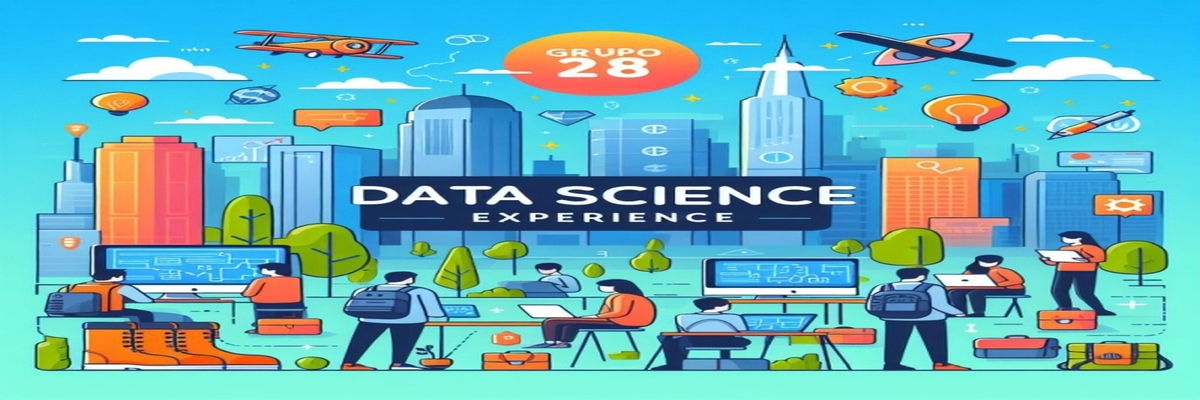

#**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




Necesitamos instalar la libreria Pycaret la que usaremos mas adelante

In [ ]:
%pip install pycaret[full]

Importamos las librerías que estaremos utilizando

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from pycaret.classification import *
global df_banco, resultados

#**2. Preprocesamiento de Datos**


---


Cargamos los datos que utilizaremos

In [3]:
df_banco = pd.read_csv("german_credit.csv")
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


Obtenemos su información

In [4]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

Obtenemos su descripción

In [5]:
df_banco.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


Veamos la cantidad de valores únicos de cada columna

In [6]:
df_banco.nunique()

default                         2
account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         3
credits_this_bank               4
job                             4
people_under_maintenance        2
telephone                       2
foreign_worker                  2
dtype: int64

Procesamos los datos mediante mediante un `map` para convertir los valores de texto a numéricos

In [7]:
def procesar_datos():
    global df_banco  # Define las variables globales

    # Eliminar duplicados
    df_banco = df_banco.drop_duplicates()

    # Tratamiento de nulos
    df_banco = df_banco.dropna()  # Eliminar registros con valores nulos
    # O
    # df_banco = df_banco.fillna(valor)  # Sustituir los valores nulos por un valor específico

    # Reemplazar textos por números en cada columna que contenga datos cualitativos
    diccionario_account = {'< 0 DM': 1, '0 <= ... < 200 DM': 2, '>= 200 DM / salary assignments for at least 1 year': 3, 'no checking account': 4}
    diccionario_credith = {'no credits taken/ all credits paid back duly': 1, 'all credits at this bank paid back duly': 2, 'existing credits paid back duly till now': 3, 'delay in paying off in the past': 4, 'critical account/ other credits existing (not at this bank)': 5}
    diccionario_purpose = {'car (new)': 1, 'car (used)': 2, 'furniture/equipment': 3, 'radio/television': 4, 'domestic appliances': 5, 'repairs': 6, 'education': 7, '(vacation - does not exist?)': 8, 'retraining': 9, 'business': 10, 'others': 10}
    diccionario_savings = {'unknown/ no savings account': 1, '.. >= 1000 DM ': 2, '500 <= ... < 1000 DM ': 3, '100 <= ... < 500 DM': 4, '... < 100 DM': 5}
    diccionario_present_es = {'.. >= 7 years': 1, '4 <= ... < 7 years': 2, '1 <= ... < 4 years': 3, '... < 1 year ': 4, 'unemployed': 5}
    diccionario_personal_ss = {'male : divorced/separated': 1, 'female : divorced/separated/married': 2, 'male : single': 3, 'male : married/widowed': 4, 'female : single': 5}
    diccionario_other_debtors = {'none': 1, 'co-applicant': 2, 'guarantor': 3}
    diccionario_property = {'real estate': 1, 'if not A121 : building society savings agreement/ life insurance': 2, 'if not A121/A122 : car or other, not in attribute 6': 3, 'unknown / no property': 4}
    diccionario_other_ip = {'bank': 1, 'stores': 2, 'none': 3}
    diccionario_housing = {'rent': 1, 'own': 2, 'for free': 3}
    diccionario_job = {'unemployed/ unskilled - non-resident': 1, 'unskilled - resident': 2, 'skilled employee / official': 3, 'management/ self-employed/ highly qualified employee/ officer': 4}
    diccionario_telephone = {'none': 0, 'yes, registered under the customers name ': 1}
    diccionario_foreign_worker = {'no': 0, 'yes': 1}


    # Crea un diccionario de reemplazo
    df_banco['account_check_status'] = df_banco['account_check_status'].map(diccionario_account)
    df_banco['credit_history'] = df_banco['credit_history'].map(diccionario_credith)
    df_banco['purpose'] = df_banco['purpose'].map(diccionario_purpose)
    df_banco['savings'] = df_banco['savings'].map(diccionario_savings)
    df_banco['present_emp_since'] = df_banco['present_emp_since'].map(diccionario_present_es)
    df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(diccionario_personal_ss)
    df_banco['other_debtors'] = df_banco['other_debtors'].map(diccionario_other_debtors)
    df_banco['property'] = df_banco['property'].map(diccionario_property)
    df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(diccionario_other_ip)
    df_banco['housing'] = df_banco['housing'].map(diccionario_housing)
    df_banco['job'] = df_banco['job'].map(diccionario_job)
    df_banco['telephone'] = df_banco['telephone'].map(diccionario_telephone)
    df_banco['foreign_worker'] = df_banco['foreign_worker'].map(diccionario_foreign_worker)

In [8]:
procesar_datos()
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1


Volvemos a obtener la información luego de mapear los datos

In [9]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

#**3. Exploración de Datos**


---


Separamos las columnas discretas para su posterior transformación

In [10]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].head()

,personal_status_sex,age,duration_in_month,credit_amount,default
0,3,67,6,1169,0
1,2,22,48,5951,1
2,3,49,12,2096,0
3,3,45,42,7882,0
4,3,53,24,4870,1


Realizamos la transformación de estas columnas mediante el método `cut`

In [11]:
def feature_engineering():
  global df_banco  # Define las variables globales
  #Usaremos el diccionario de personal_status_sex para crear 2 nuevas columnas
  diccionario_personal_ss = {1 : 0, 2 : 1, 3 : 0, 4 : 0, 5 : 1}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(diccionario_personal_ss)
  diccionario_personal_ss = {1 : 0, 2 : 0, 3 : 1, 4 : 0, 5 : 1}
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(diccionario_personal_ss)
  #Aquí usaremos la función cut para colocar las diferentes divisiones de las columnas a modificar
  #age, duration_in_month, credit_amount
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
  df_banco['rango_plazos_credito'] = pd.cut(x = df_banco['duration_in_month'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])
  df_banco['rango_valor_credito'] = pd.cut(x = df_banco['credit_amount'], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000], labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
  #Finalmente eliminaremos las columnas base con las que trabajamos
  df_banco.drop(['personal_status_sex','age','duration_in_month', 'credit_amount'], axis=1, inplace=True)

In [12]:
feature_engineering()
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


Graficamos las columnas categóricas de nuestro set de datos

In [13]:
atributos = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']

def analisis_exploratorio():

    # Calcula el número de filas necesarias
    nrows = len(atributos) // 2
    if len(atributos) % 2 != 0:
        nrows += 1

    fig, axs = plt.subplots(nrows, 2, figsize=(10, nrows*5))

    # Se asegúra de que axs sea una lista de listas en caso de que solo haya una fila
    if nrows == 1:
        axs = [axs]

    colors = ['blue', 'orange', 'green', 'red', 'purple']

    # Recorre cada variable discreta y crea un gráfico de barras
    for idx, var in enumerate(atributos):
        row = idx // 2
        col = idx % 2
        axs[row][col].bar(df_banco[var].value_counts().index, df_banco[var].value_counts().values, color=colors)
        axs[row][col].set_title(var)

    # Si el número de variables discretas es impar, elimina el último gráfico vacío
    if len(atributos) % 2 != 0:
        fig.delaxes(axs[row][1])

    plt.tight_layout()
    plt.show()

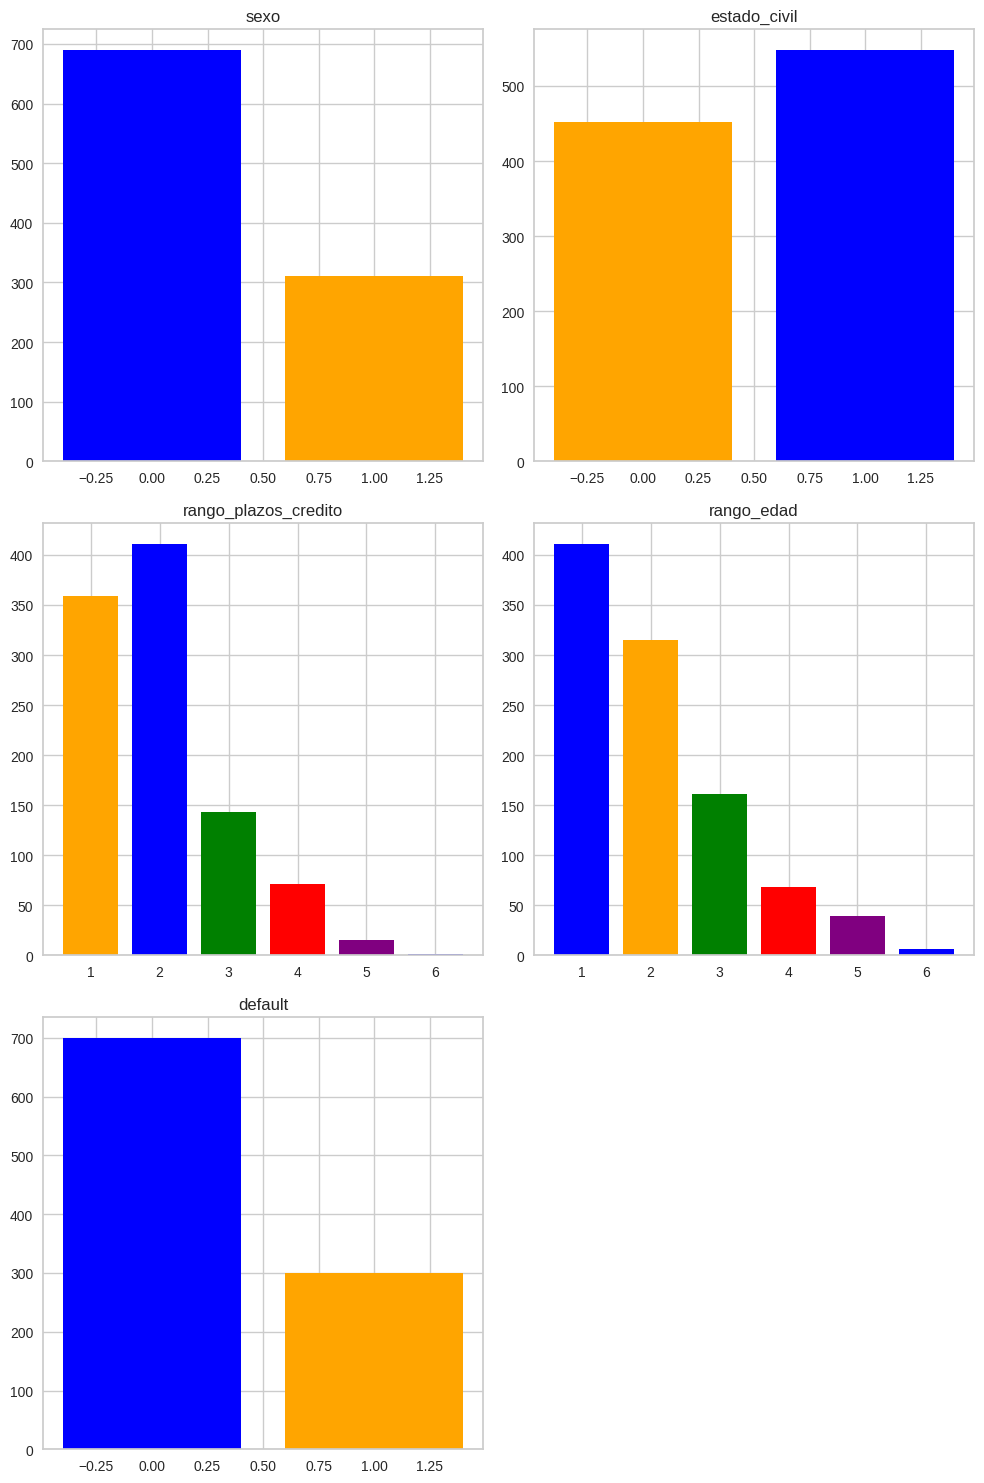

In [14]:
analisis_exploratorio()

Aplicamos la técnica de sobremuestreo en nuestros datos para balancear la columna `default`

In [15]:
# 'default' esta desbalanceado, usaremos SMOTE
sm = SMOTE(random_state=123)

# Dividimos la columna 'default' del resto del dataframe
X = df_banco.drop('default', axis=1)
y = df_banco['default']

# Aplico SMOTE
X, y = sm.fit_resample(X, y)

# Unimos de nuevo
X['default'] = y
df_banco = X

# Vemos como se distribuye ahora
df_banco['default'].value_counts()

0    700
1    700
Name: default, dtype: int64

Visualizamos el mapa de calor de los datos

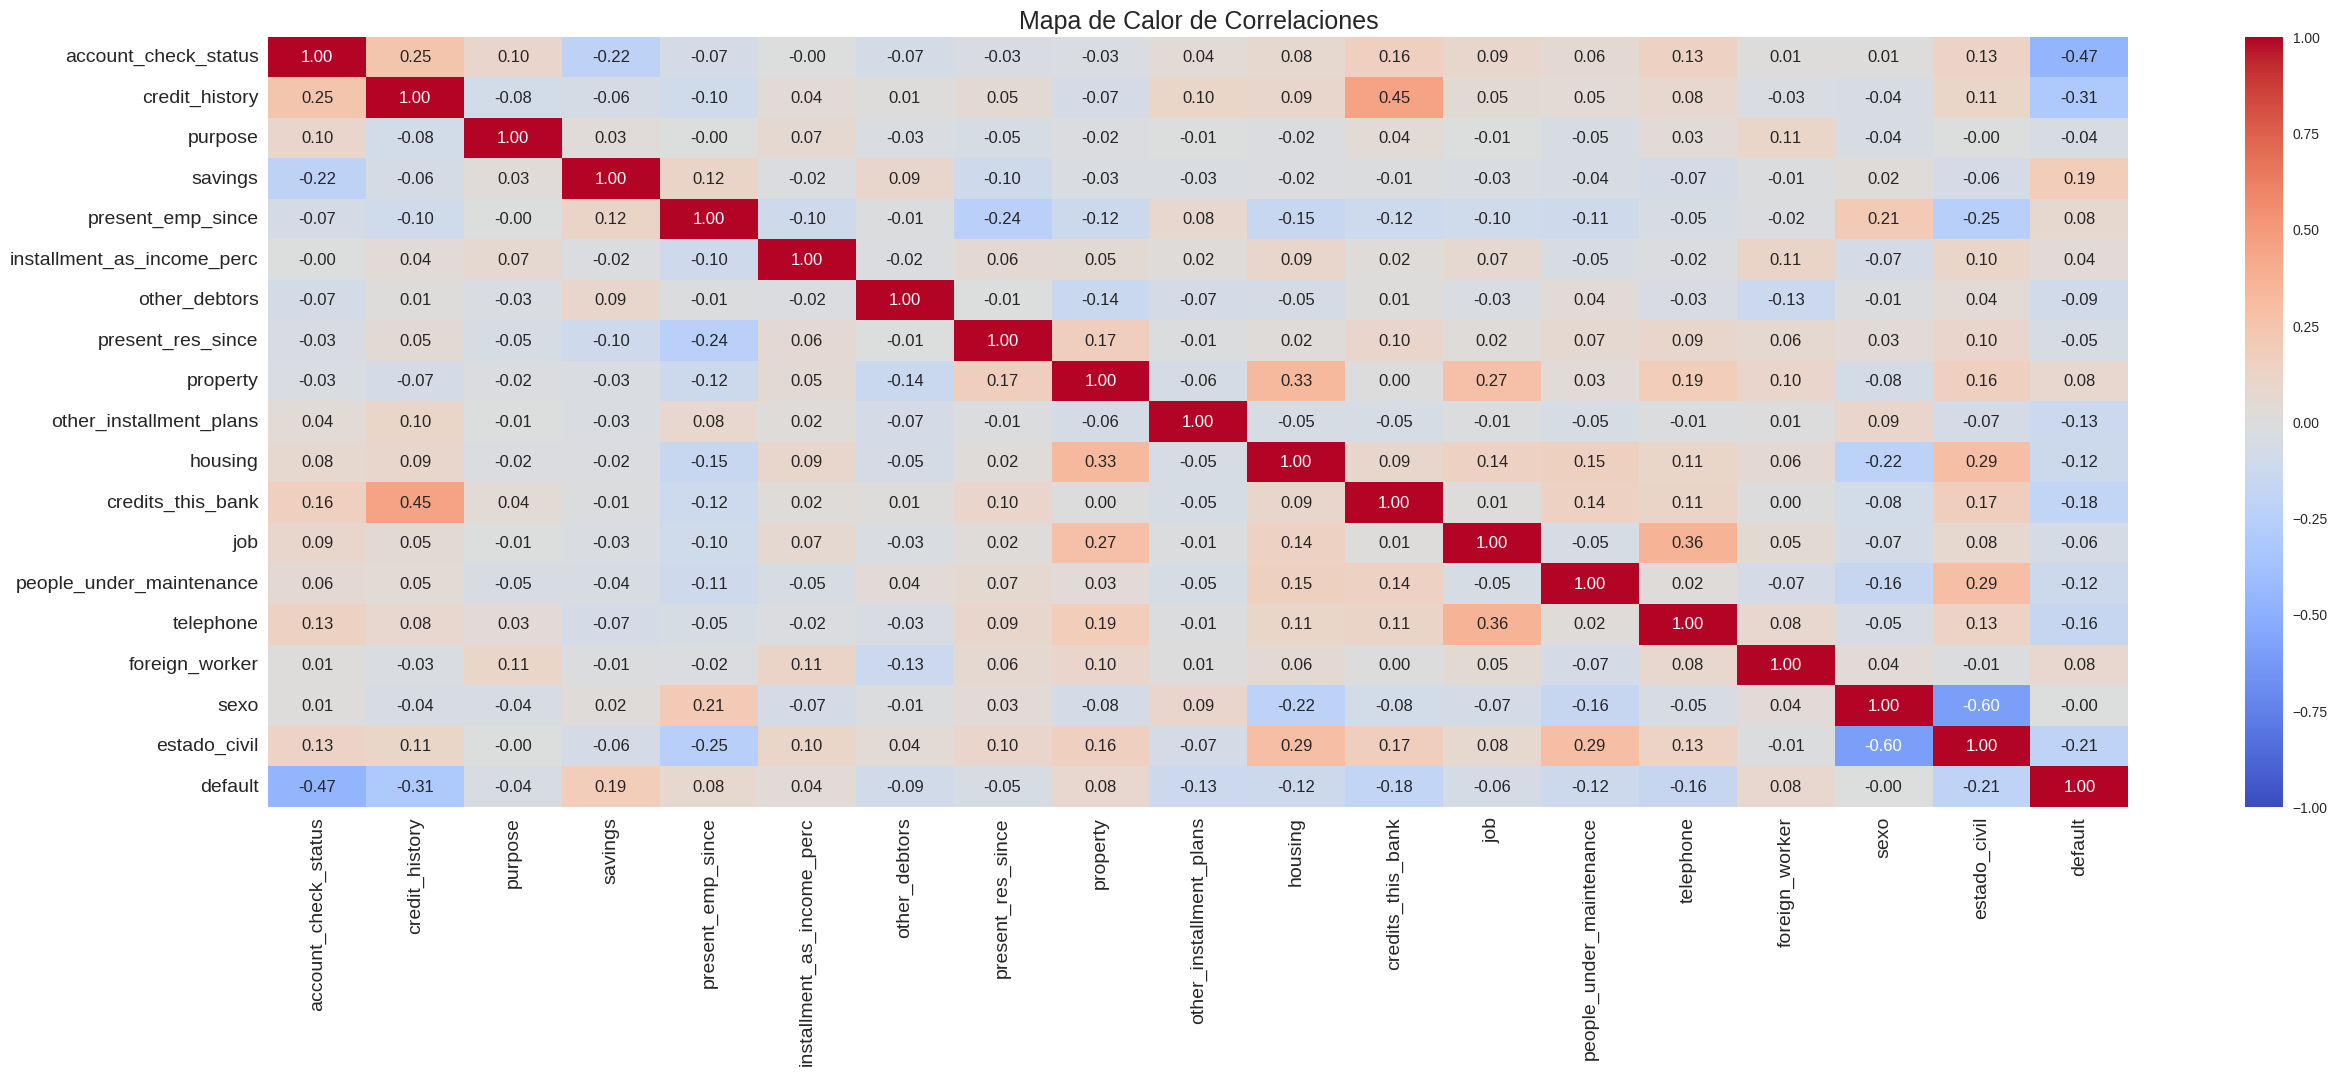

In [16]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1) ### AGREGADO vmin=-1
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

Visualizamos una tabla cruzada para ver como se comportan juntas las columnas `estado_civil` y `sexo`

In [17]:
pd.crosstab(df_banco['estado_civil'], df_banco['sexo'])

sexo,0,1
estado_civil,,
0,339,401
1,660,0


#**4. Construcción de Modelos**


---


Dividimos los datos para entrenamiento y para prueba

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_banco.drop('default', axis=1), df_banco['default'], test_size=0.2, random_state=123)

**Pycaret** es una biblioteca de Python de código abierto y de bajo código que se utiliza para el desarrollo de modelos de Machine Learning. Su objetivo es reducir el tiempo del ciclo de hipótesis a conocimiento en un experimento de ML. Permite a los científicos de datos realizar experimentos de extremo a extremo de manera rápida y eficiente.

Con **PyCaret**, puedes hacer muchas cosas:

* Aplicar imputación de valores perdidos, escalado, ingeniería de características o selección de características de una forma muy sencilla.

* Entrenar más de 100 modelos de machine learning, de todo tipo (clasificación, regresión, pronóstico) con una sola línea de código.

* Registrar los modelos entrenados en MLFlow de una forma muy sencilla.

* Crear una API o un Docker para poner el modelo en producción.

* Subir tu modelo a la nube para poder agilizar el despliegue en producción.

Además, **PyCaret** es compatible con cualquier tipo de notebook de Python y permite realizar comparaciones de varios modelos automáticamente. Por lo tanto, **PyCaret** es una herramienta muy útil que todo científico de datos debe conocer.

In [19]:
## Corriendo esta celda se pueden ver las funciones extras que pueden en setup (inglés)
# print(setup.__doc__)

Construímos nuestro modelo Pycaret

In [20]:
# Pycaret nos obliga a unir los datos de entrenamiento
X_train['default'] = y_train

# Setup es el primer y único paso obligatorio en cualquier experimento de aprendizaje automático que utilice PyCaret
s = setup(X_train, target = 'default')

,Description,Value
0,Session id,7299
1,Target,default
2,Target type,Binary
3,Original data shape,"(1120, 22)"
4,Transformed data shape,"(1120, 48)"
5,Transformed train set shape,"(784, 48)"
6,Transformed test set shape,"(336, 48)"
7,Numeric features,18
8,Categorical features,3
9,Preprocess,True


> AYUDA SOBRE METRICAS EN EL CREDITO BANCARIO

1. Área bajo la curva ROC (``AUC``): Esta métrica es crucial ya que mide la capacidad del modelo para distinguir entre los clientes que cumplirán con sus obligaciones de crédito y los que no. Un AUC-ROC más alto indica un mejor rendimiento del modelo.

2. Precisión (`Accuracy`): Esta métrica mide la proporción de predicciones correctas hechas por el modelo. En el contexto del scoring bancario, esto podría ser la proporción de clientes que el modelo predijo correctamente que pagarían o incumplirían sus obligaciones de crédito.

3. Sensibilidad (``Recall``): Esta métrica es importante en el scoring bancario porque mide la proporción de incumplimientos reales que el modelo es capaz de capturar.

4. Valor predictivo positivo (``Precision``): Esta métrica mide la proporción de incumplimientos predichos que son realmente incumplimientos.

In [21]:
## Para ver opciones a usar dentro de compare_models correr esta celda
# print(compare_models.__doc__)

Como mencionamos en la explicación anterior, la metrica mas utilizada en el scoring bancario es `auc`

In [22]:
# Comparar todos los modelos que incluye pycaret ordenado por su valor 'AUC'
best = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8049,0.8904,0.8282,0.7906,0.8080,0.6099,0.6123,0.5500
et,Extra Trees Classifier,0.7869,0.8873,0.8000,0.7799,0.7880,0.5739,0.5772,0.4320
catboost,CatBoost Classifier,0.8060,0.8816,0.8282,0.7919,0.8085,0.6122,0.6151,1.5920
xgboost,Extreme Gradient Boosting,0.7946,0.8719,0.8128,0.7847,0.7978,0.5893,0.5909,0.2110
lightgbm,Light Gradient Boosting Machine,0.7933,0.8706,0.8205,0.7765,0.7974,0.5867,0.5885,0.2100
gbc,Gradient Boosting Classifier,0.7907,0.8667,0.8359,0.7660,0.7980,0.5817,0.5868,0.2430
ada,Ada Boost Classifier,0.7705,0.8381,0.7744,0.7680,0.7696,0.5411,0.5433,0.3110
knn,K Neighbors Classifier,0.7615,0.8347,0.8282,0.7315,0.7755,0.5234,0.5303,0.2420
lr,Logistic Regression,0.7654,0.8319,0.7769,0.7590,0.7664,0.5310,0.5332,1.4900
lda,Linear Discriminant Analysis,0.7667,0.8298,0.7846,0.7573,0.7695,0.5336,0.5358,0.1110


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [36]:
## Para ver opciones a usar dentro de plot_models correr esta celda
# print(plot_model.__doc__)

Visualizamos los resultados del entrenamiento con el mejor de los modelos entrenados

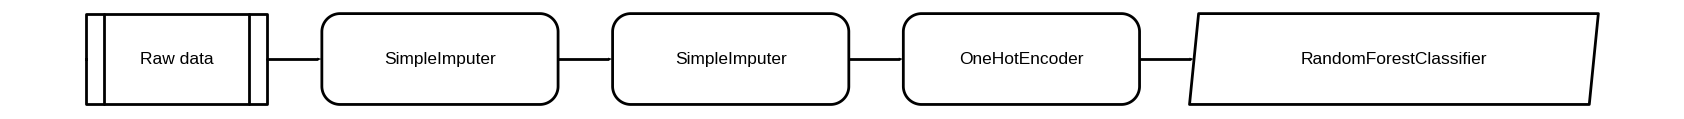

In [34]:
# Visualiza las transformaciones que aplicó pycaret de forma automática
plot_model(best, plot = 'pipeline')

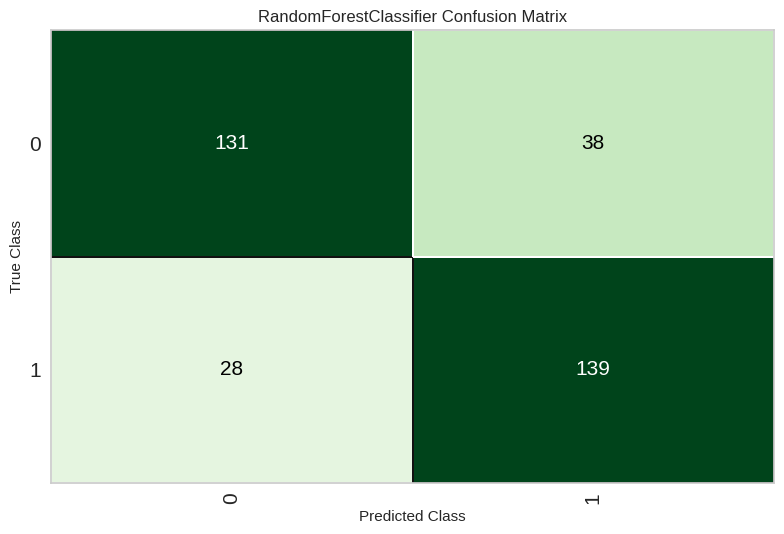

In [24]:
# Generamos una matriz de confusión
plot_model(best, plot = 'confusion_matrix')

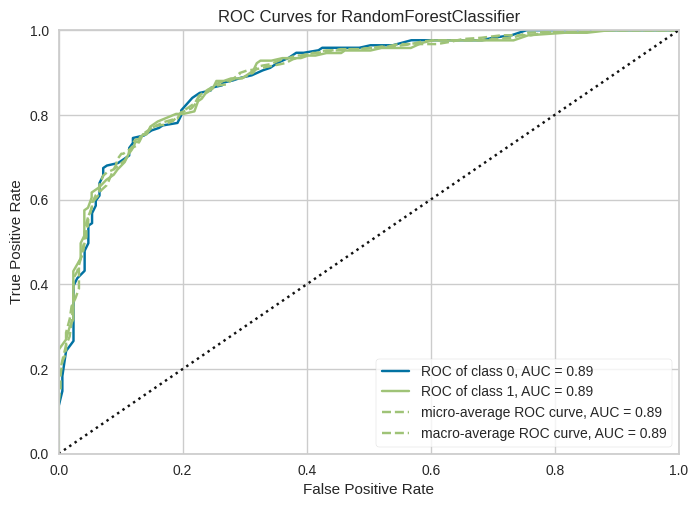

In [29]:
# Visualizar el área bajo la curva
plot_model(best, plot = 'auc')

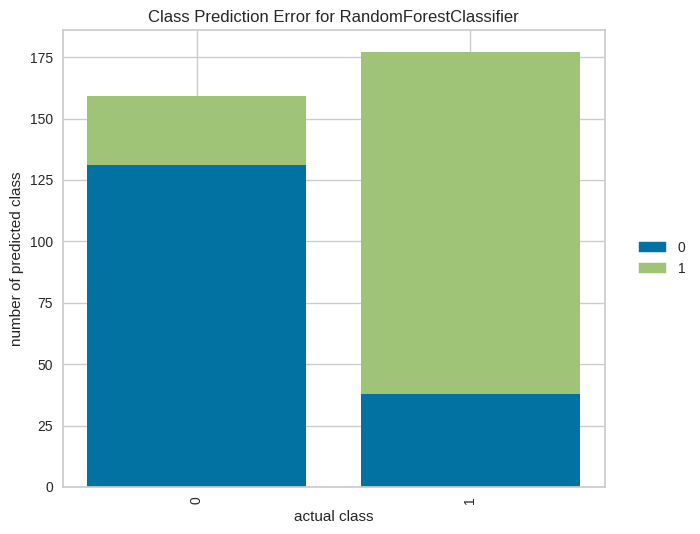

In [31]:
# Visualizar los errores en la prediccion
plot_model(best, plot = 'error')

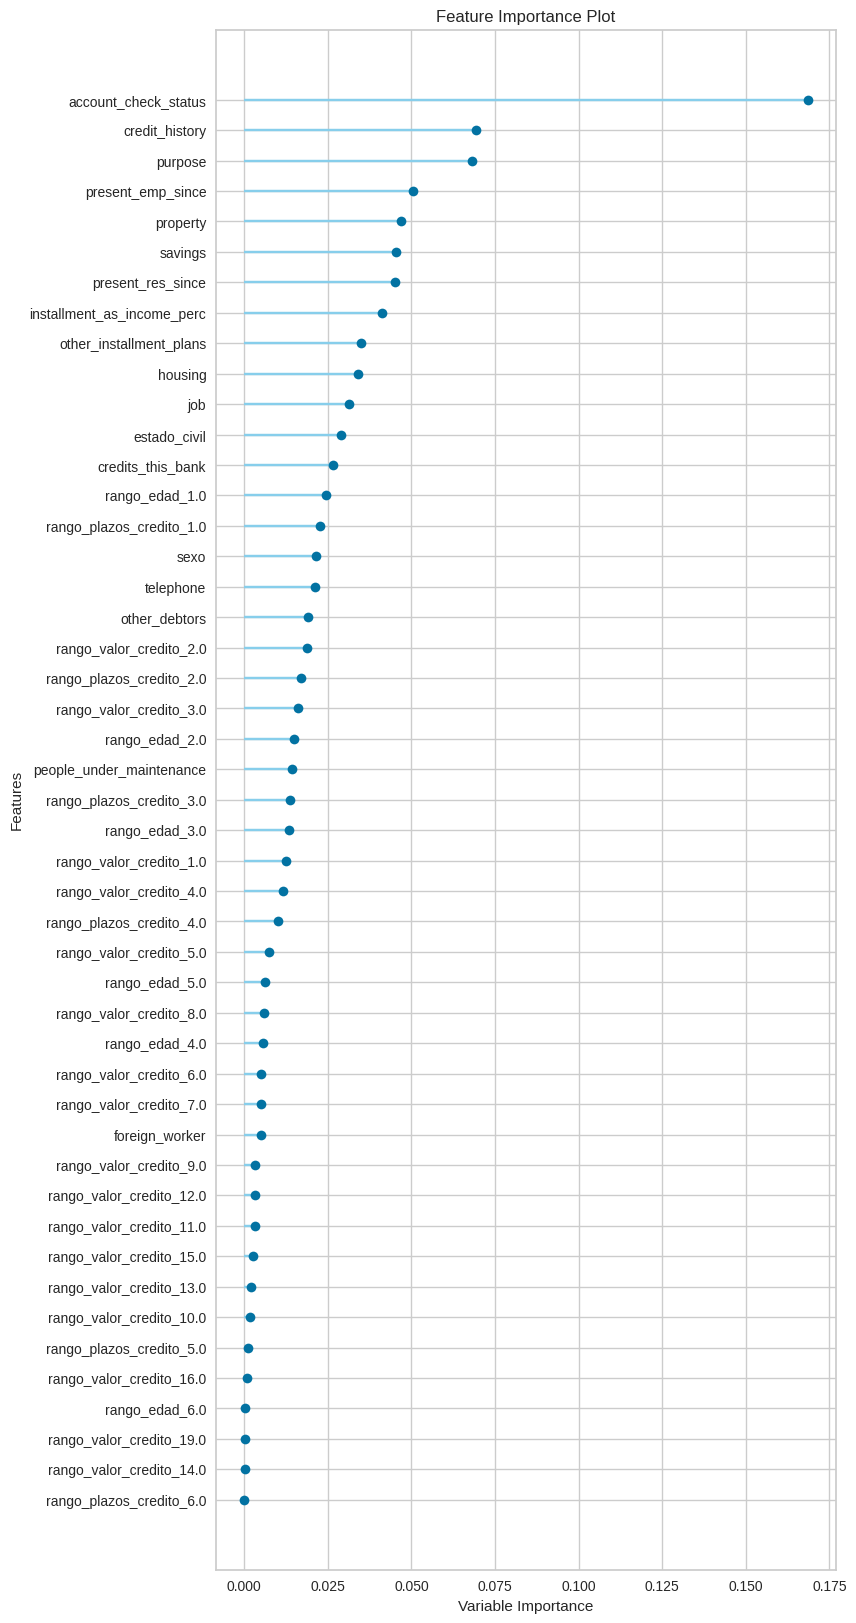

In [26]:
# Visualizar la importancia de las variables
plot_model(best, plot = 'feature_all')

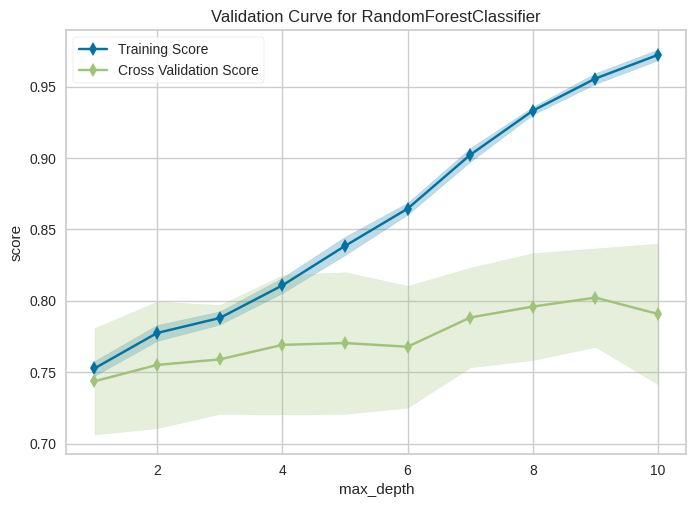

In [35]:
# Visualizar la curva de validación cruzada del modelo
plot_model(best, plot = 'vc')

Finalizamos el entrenamiento, guardamos el mejor modelo que encontro pycaret y realizamos las predicciones para nuestros datos de prueba

In [27]:
# finalizar el modelo
final_best = finalize_model(best)

# guarda el modelo como archivo pickle
save_model(final_best, 'credit_score')

# Generamos las predicciones con los datos de test
predictions = predict_model(final_best, data=X_test)
predictions.head()

Transformation Pipeline and Model Successfully Saved


,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,...,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito,prediction_label,prediction_score
952,2,3,2,3,4,3,1,4,3,3,...,1,0,1,1,0,1,2,5,1,0.77
908,4,4,2,5,4,1,1,2,2,3,...,1,0,1,1,0,3,2,4,0,0.75
221,1,3,8,1,3,4,1,4,2,1,...,1,1,1,1,0,1,1,2,1,0.61
310,2,3,3,1,5,3,1,4,4,1,...,1,1,1,0,1,2,4,6,0,0.66
218,1,3,4,5,3,2,1,2,1,3,...,1,0,1,0,0,1,2,4,1,0.91


#**5. Evaluación y Selección del Modelo**


---


Evaluamos los resultados del modelo seleccionado en 5 metricas diferentes

In [41]:
resultados = {
  "AUC score": round(roc_auc_score(y_test, predictions['prediction_label']), 3),
  "Accuracy score": round(accuracy_score(y_test, predictions['prediction_label']), 3),
  "Recall score": round(recall_score(y_test, predictions['prediction_label']), 3),
  "Precision score": round(precision_score(y_test, predictions['prediction_label']), 3),
  "F1 score": round(f1_score(y_test, predictions['prediction_label']), 3)
}

print(f"El mejor modelo que seleccionó pycaret es: Clasificador Random Forest")
print("\nLos resultados para nuestros datos de prueba fueron los siguiente:\n")
pd.DataFrame(resultados.items(), columns=['Metrica', 'Valor'])

El mejor modelo que seleccionó pycaret es: Clasificador Random Forest

Los resultados para nuestros datos de prueba fueron los siguiente:



,Metrica,Valor
0,AUC score,0.835
1,Accuracy score,0.836
2,Recall score,0.853
3,Precision score,0.830
4,F1 score,0.841
